In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Script to remove outliers from original datasets

In [2]:
# function to get .csv filenames
def csv_files():
    all_files = os.listdir()
    csvs = [f for f in all_files if '.csv' in f]
    return csvs

# specify species names
species = ["S"+str(i+1) for i in range(10)]

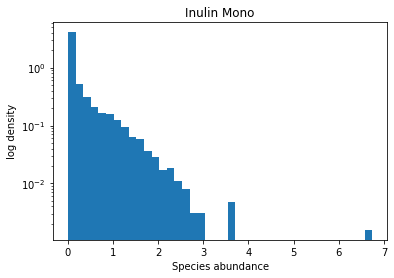

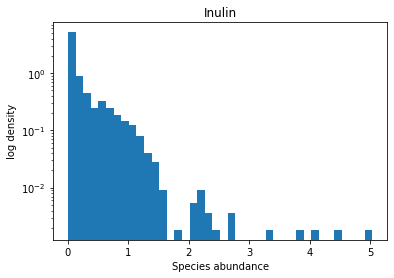

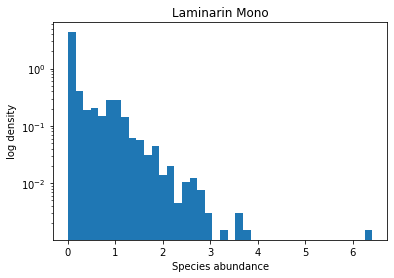

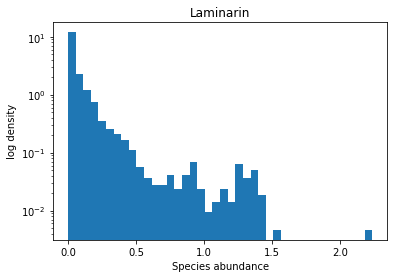

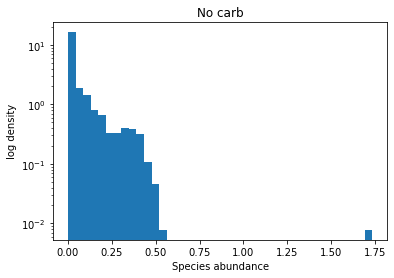

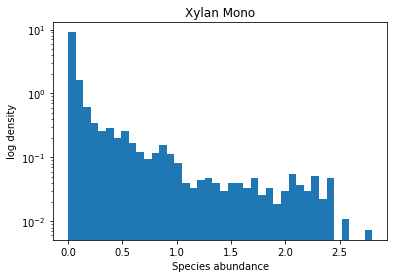

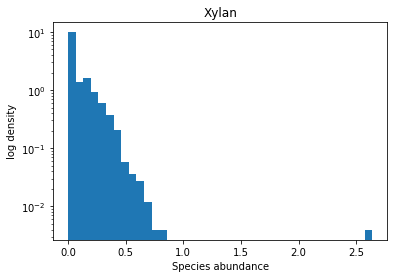

In [3]:
for file in csv_files():
    df = pd.read_csv(file)
    abundances = df[species].values.flatten()
    non_zeros = abundances > 0
    plt.hist(abundances[non_zeros], bins=40, density=True)
    plt.yscale('log')
    plt.xlabel("Species abundance")
    plt.ylabel("log density")
    plt.title(file.split(".csv")[0].split("Comms")[1])
    plt.show()

In [4]:
# define abundance cutoff for each dataset 
cutoffs = {'MonoCommsInulin Mono.csv': 4., 
           'MonoCommsInulin.csv': 3.,
           'MonoCommsLaminarin Mono.csv': 6.,
           'MonoCommsLaminarin.csv': 2.,
           'MonoCommsNo carb.csv': 1.,
           'MonoCommsXylan Mono.csv': 3.,
           'MonoCommsXylan.csv': 2.}

In [5]:
for file in csv_files():
    df = pd.read_csv(file)
    abundances = df[species].values
    treatments = df.Treatment.values
    inds = []
    for i,replicate in enumerate(abundances):
        if any(replicate > cutoffs[file]):
            inds.append(False)
            print(f"Sample {treatments[i]} removed from {df.Media.values[0]}")
        else:
            inds.append(True)
    df_rm_outliers = df.iloc[inds].copy()
    
    # save data
    fnamesplit = file.split(".")
    fname = fnamesplit[0] + "RmOutlier." + fnamesplit[1]
    df_rm_outliers.to_csv("../OutlierRemovedData/"+fname, index=False)

Sample SubCommD6_rep1.0 removed from Inulin Mono
Sample COMM10<EL_rep2.0_passage4.0 removed from Inulin
Sample SubCommD6_rep1.0 removed from Inulin
Sample SubCommD4_rep0.0 removed from Inulin
Sample SubCommD2_rep0.0 removed from Inulin
Sample SubCommD2_rep1.0 removed from Inulin
Sample SubCommD18_rep0.0 removed from Laminarin Mono
Sample SubCommD1_rep2.0 removed from Laminarin
Sample SubCommD1_rep2.0 removed from No carb
Sample SubCommD2_rep0.0 removed from Xylan
